In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pylab import rcParams

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [ ]:
df = pd.read_csv("data/creditcard.csv")

In [3]:
df.shape

(284807, 31)

In [4]:
df.isnull().values.any()

np.False_

0    284315
1       492
Name: count, dtype: int64


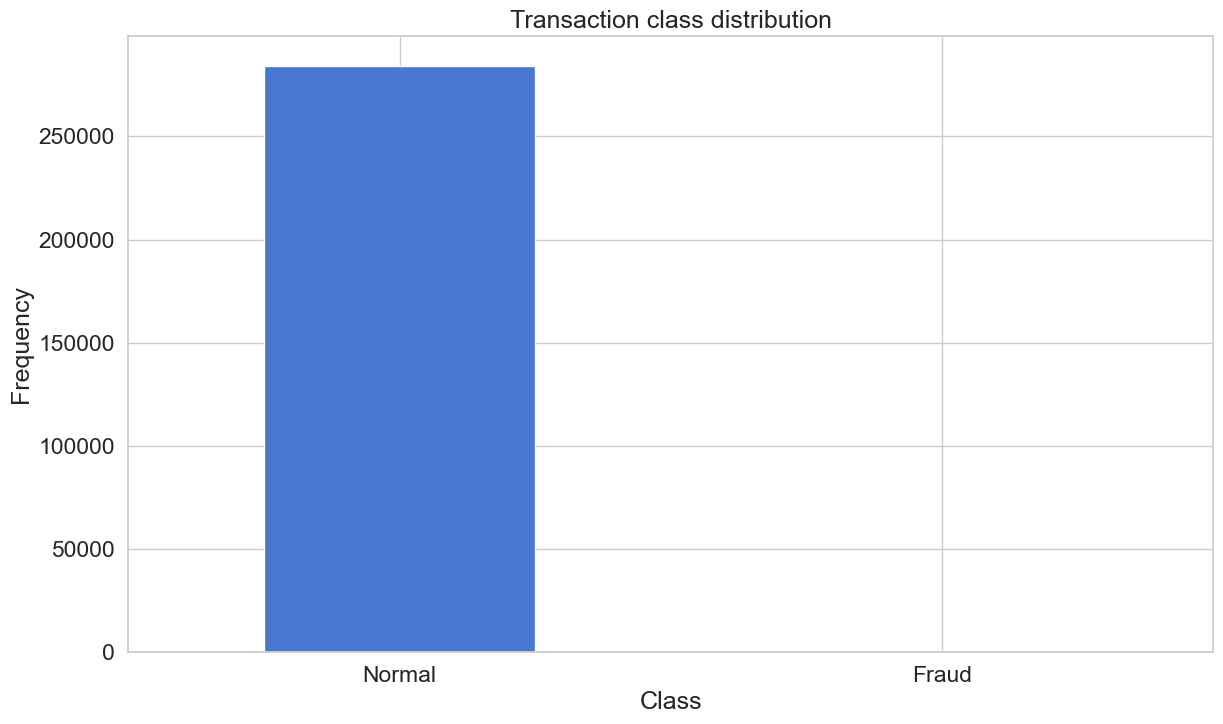

In [5]:
count_classes = pd.Series(df['Class'].values).value_counts()
print(count_classes)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [6]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]

In [7]:
frauds.shape

(492, 31)

In [8]:
normal.shape

(284315, 31)

In [9]:
frauds.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

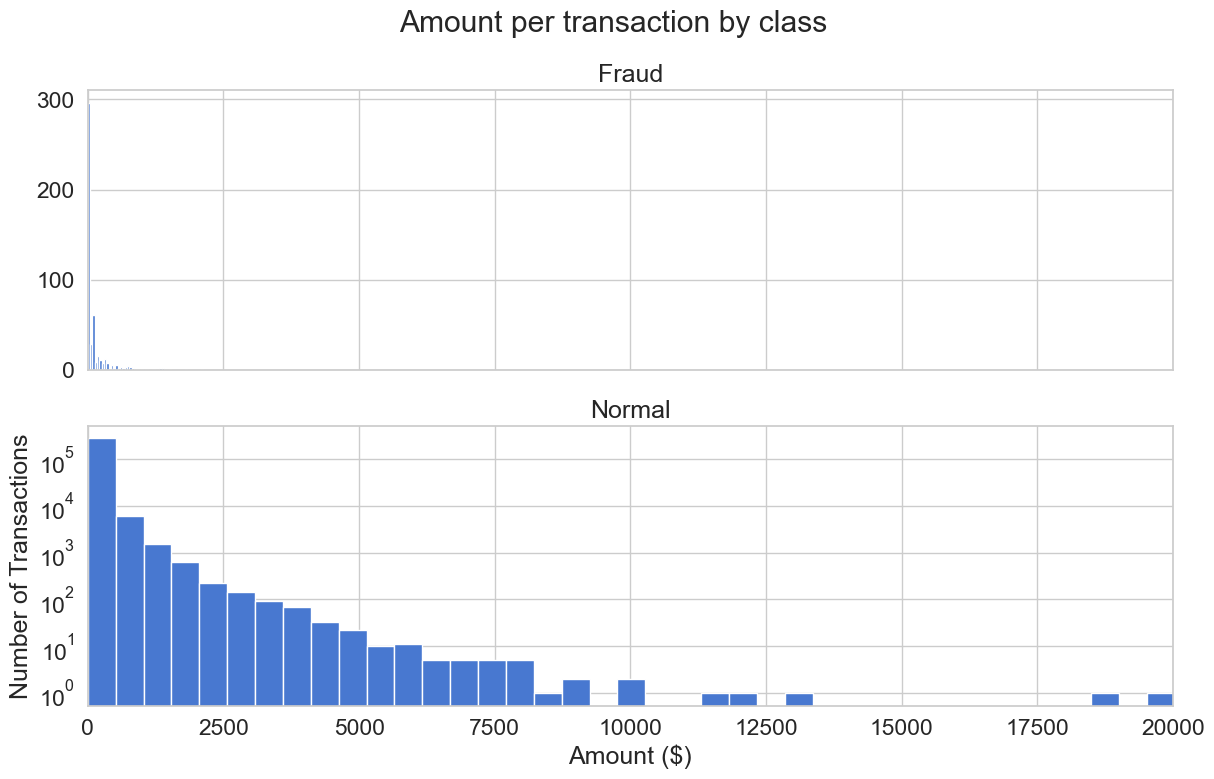

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

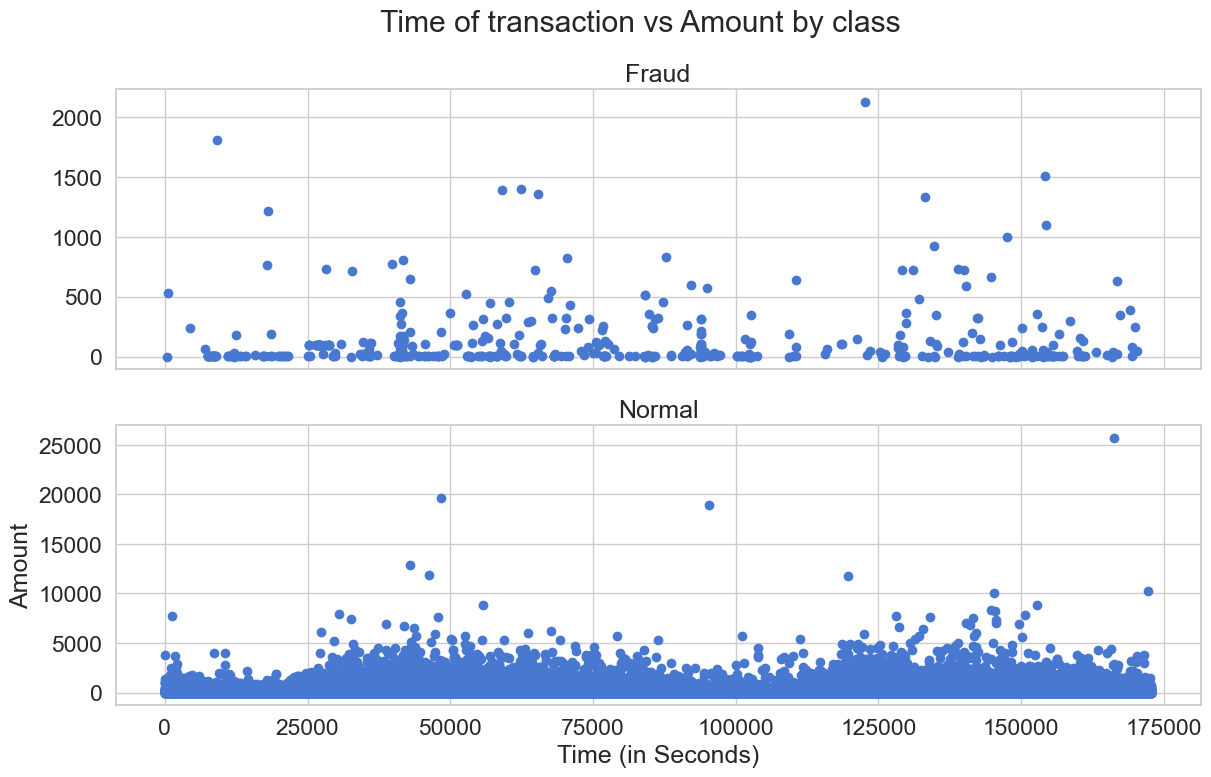

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [13]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df['Class']

print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), len(y_train.loc[df['Class'] == 1])/len(y_train))

ImportError: cannot import name 'ComplexWarning' from 'numpy.core.numeric' (c:\Users\Rohith\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\numeric.py)

In [15]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
print("Score: ", logistic.score(X_test, y_test))

Score:  0.9988864701102494


c:\Users\Rohith\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_predicted = np.array(logistic.predict(X_test))
y_right = np.array(y_test)

(99683,)
(99683,)


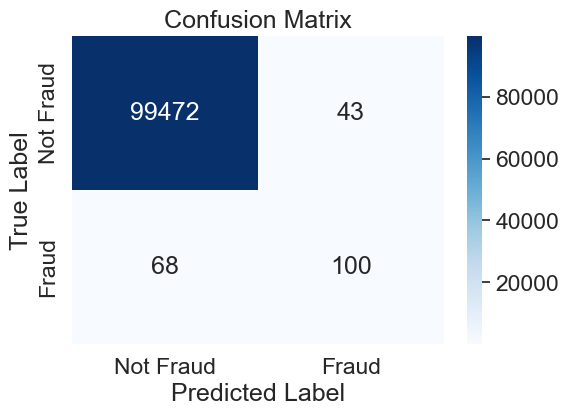

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_predicted)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_predicted))
print("Precision:", precision_score(y_test, y_predicted))
print("Recall:", recall_score(y_test, y_predicted))
print("F1 Score:", f1_score(y_test, y_predicted))


Accuracy: 0.9988864701102494
Precision: 0.6993006993006993
Recall: 0.5952380952380952
F1 Score: 0.6430868167202572


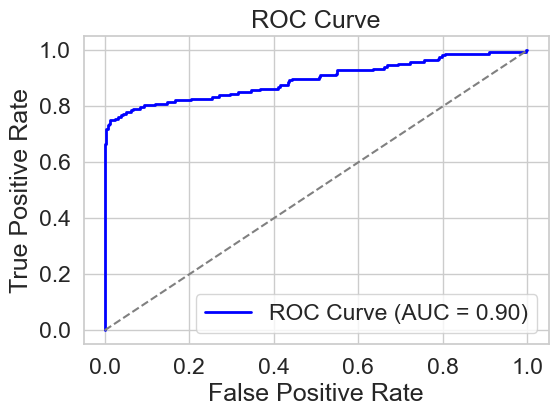

In [26]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_probs = logistic.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random guess)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


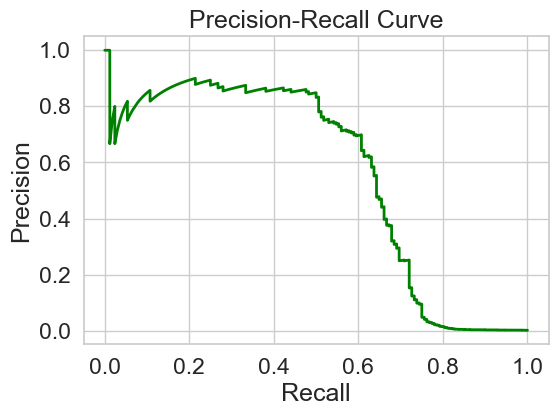

In [27]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


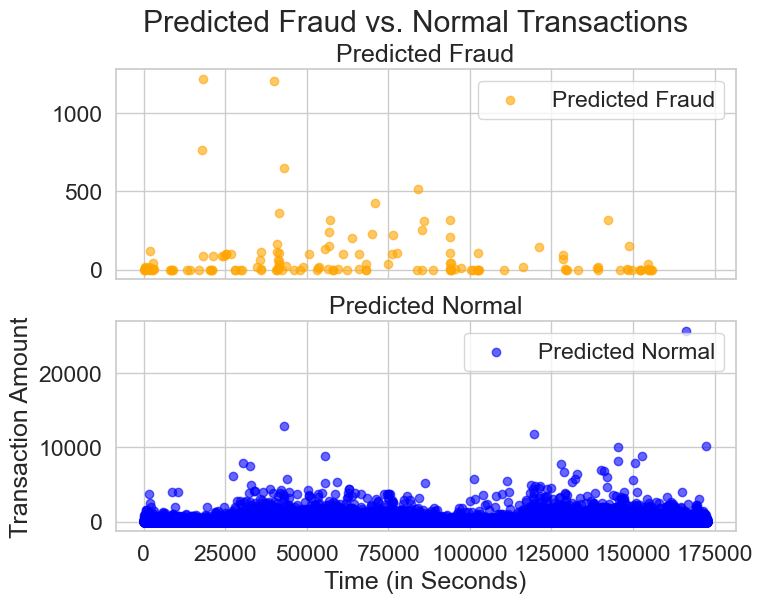

In [28]:
import matplotlib.pyplot as plt

# Separate predictions into fraud (1) and normal (0)
fraud_predicted = X_test[y_predicted == 1]  # Predicted fraud cases
normal_predicted = X_test[y_predicted == 0]  # Predicted normal cases

# Create subplot
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
f.suptitle('Predicted Fraud vs. Normal Transactions')

# Scatter plot for predicted fraud cases
ax1.scatter(fraud_predicted.Time, fraud_predicted.Amount, color='orange', label="Predicted Fraud", alpha=0.6)
ax1.set_title('Predicted Fraud')
ax1.legend()

# Scatter plot for predicted normal cases
ax2.scatter(normal_predicted.Time, normal_predicted.Amount, color='blue', label="Predicted Normal", alpha=0.6)
ax2.set_title('Predicted Normal')
ax2.legend()

# Labels
plt.xlabel('Time (in Seconds)')
plt.ylabel('Transaction Amount')
plt.show()


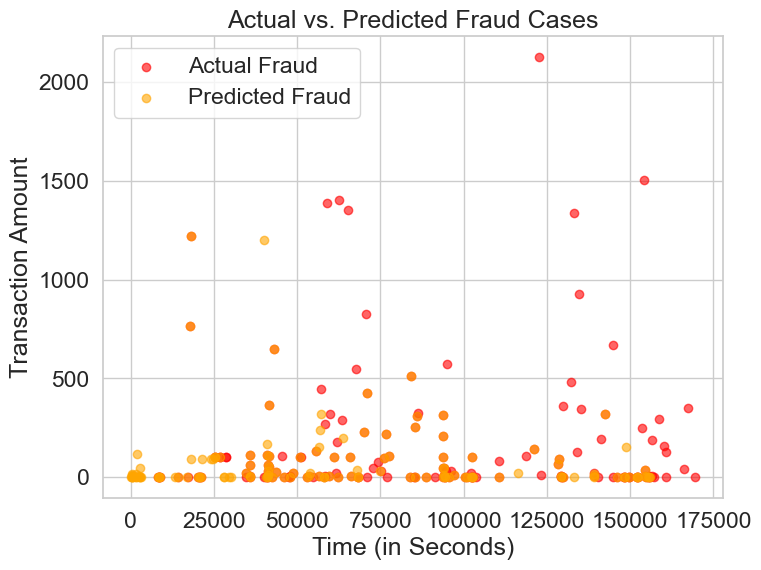

In [31]:
plt.figure(figsize=(8, 6))

# Plot actual fraud cases
plt.scatter(X_test[y_test == 1].Time, X_test[y_test == 1].Amount, color='red', label="Actual Fraud", alpha=0.6)

# Plot predicted fraud cases
plt.scatter(X_test[y_predicted == 1].Time, X_test[y_predicted == 1].Amount, color='orange', label="Predicted Fraud", alpha=0.6)

plt.xlabel("Time (in Seconds)")
plt.ylabel("Transaction Amount")
plt.title("Actual vs. Predicted Fraud Cases")
plt.legend()
plt.show()
